Uploading file from local drive

In [2]:
from google.colab import files
dataset = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


Importing Libraries

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Importing the dataset

In [4]:
dataframe1 = pd.read_csv("train.csv")
print(dataframe1)
dataframe2 = pd.read_csv("test.csv")
print(dataframe2)

      Id   Open Date        City  City Group Type  ...  P34  P35  P36  P37  revenue
0      0  07/17/1999    İstanbul  Big Cities   IL  ...    5    4    3    4  5653753
1      1  02/14/2008      Ankara  Big Cities   FC  ...    0    0    0    0  6923131
2      2  03-09-2013  Diyarbakır       Other   IL  ...    0    0    0    0  2055379
3      3  02-02-2012       Tokat       Other   IL  ...   18   12   12    6  2675511
4      4  05-09-2009   Gaziantep       Other   IL  ...    3    4    3    3  4316715
..   ...         ...         ...         ...  ...  ...  ...  ...  ...  ...      ...
132  132  06/25/2008     Trabzon       Other   FC  ...    0    0    0    0  5787594
133  133  10-12-2006       İzmir  Big Cities   FC  ...    0    0    0    0  9262754
134  134  07-08-2006     Kayseri       Other   FC  ...    0    0    0    0  2544857
135  135  10/29/2010    İstanbul  Big Cities   FC  ...    0    0    0    0  7217634
136  136  09-01-2009    İstanbul  Big Cities   FC  ...    0    0    0    0  

Preprocessing steps

In [5]:
a = dataframe1["Open Date"].unique()
b = dict()
c = 0
for i in a:
  b.update({i:c})
  c=c+1
dataframe1["Open Date"] = dataframe1["Open Date"].map(b)

a1 = dataframe2["Open Date"].unique()
b1 = dict()
c1 = 0
for i in a1:
  b1.update({i:c1})
  c1 = c1+1
dataframe2["Open Date"] = dataframe2["Open Date"].map(b1)

In [6]:
k={"FC":0,"IL":1,"DT":2}
dataframe1["Type"] = dataframe1["Type"].map(k)

k={"FC":0,"IL":1,"DT":2}
dataframe2["Type"] = dataframe2["Type"].map(k)

In [7]:
l={"Big Cities":0,"Other":1}
dataframe1["City Group"] = dataframe1["City Group"].map(l)

l={"Big Cities":0,"Other":1}
dataframe2["City Group"] = dataframe2["City Group"].map(l)

In [8]:
a = dataframe1["City"].unique()
b=dict()
c=0
for i in a:
  b.update({i:c})
  c=c+1
dataframe1['City'] = dataframe1["City"].map(b)

a = dataframe2["City"].unique()
b=dict()
c=0
for i in a:
  b.update({i:c})
  c=c+1
dataframe2['City'] = dataframe2["City"].map(b)

In [51]:
X = dataframe1.iloc[:, :-1].values
y = dataframe1.iloc[:, -1].values

dataframe2 = dataframe2.dropna()
X1 = dataframe2.iloc[ : , : ].values

In [49]:
dataframe1.info()
dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    int64  
 2   City        137 non-null    int64  
 3   City Group  137 non-null    int64  
 4   Type        137 non-null    int64  
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

Linear Regression

In [52]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_pred = lin_reg.predict(X)
lin_pred_1 = lin_reg.predict(X1)
lin_mse = mean_squared_error(y, lin_pred)
print(lin_mse)

4528289004115.377


Multiple Linear Regression

In [32]:
np.set_printoptions(precision=2)
print(np.concatenate((lin_pred.reshape(len(lin_pred),1), y.reshape(len(y),1)),1))

[[ 5956968.2   5653753.  ]
 [ 5271934.9   6923131.  ]
 [ 3059655.57  2055379.  ]
 [ 3989605.01  2675511.  ]
 [ 3420255.58  4316715.  ]
 [ 6569332.25  5017319.  ]
 [ 5067685.77  5166635.  ]
 [ 4066350.01  4491607.  ]
 [ 4035485.77  4952497.  ]
 [ 2365226.96  5444227.  ]
 [ 6712672.5   3745135.  ]
 [ 4775174.99  5161370.  ]
 [ 1750646.85  1734634.  ]
 [ 4612325.16  4807746.  ]
 [ 1943534.89  1999097.  ]
 [ 3815190.24  3218918.  ]
 [ 6903427.78 19696939.  ]
 [ 5264680.44  8213524.  ]
 [ 3026251.09  5337526.  ]
 [ 3253083.38  2021934.  ]
 [ 6954675.58  5525735.  ]
 [ 4785162.91  1149870.  ]
 [ 3454256.31  3956086.  ]
 [ 4552410.25  2999068.  ]
 [ 6598946.47  8904084.  ]
 [ 4032247.81  3778621.  ]
 [ 4344946.24  2267425.  ]
 [ 4007570.6   5435276.  ]
 [ 3763673.15  4705945.  ]
 [ 3198572.62  3447890.  ]
 [ 1561226.69  3008199.  ]
 [ 2454556.68  2058644.  ]
 [ 4530830.42  3261924.  ]
 [ 3701398.24  2371202.  ]
 [ 4739694.39  4100886.  ]
 [ 3465096.24  3903884.  ]
 [ 4839096.15  3028267.  ]
 

Polynomial Regression

In [54]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)
lin_mse_poly = mean_squared_error(y,lin_pred)
lin_mse_poly

4528289004115.377

Random Forest Regression

In [53]:
random_reg = RandomForestRegressor()
random_reg.fit(X, y)
random_pred = random_reg.predict(X)
random_pred_1 = random_reg.predict(X1)
random_mse = mean_squared_error(y,random_pred)
print(random_mse)

861999550911.6923


In [55]:
h = dataframe1.drop('revenue', axis = 1)
h_list = list(h.columns)
importances = list(random_reg.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(h, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: P29                  Importance: 0.14
Variable: Id                   Importance: 0.12
Variable: City                 Importance: 0.09
Variable: Open Date            Importance: 0.08
Variable: P6                   Importance: 0.05
Variable: P28                  Importance: 0.05
Variable: P19                  Importance: 0.04
Variable: P20                  Importance: 0.04
Variable: P1                   Importance: 0.03
Variable: P17                  Importance: 0.03
Variable: P22                  Importance: 0.03
Variable: P23                  Importance: 0.03
Variable: P2                   Importance: 0.02
Variable: P3                   Importance: 0.02
Variable: P8                   Importance: 0.02
Variable: P11                  Importance: 0.02
Variable: P12                  Importance: 0.02
Variable: P13                  Importance: 0.02
Variable: P21                  Importance: 0.02
Variable: P25                  Importance: 0.02
Variable: City Group           Importanc

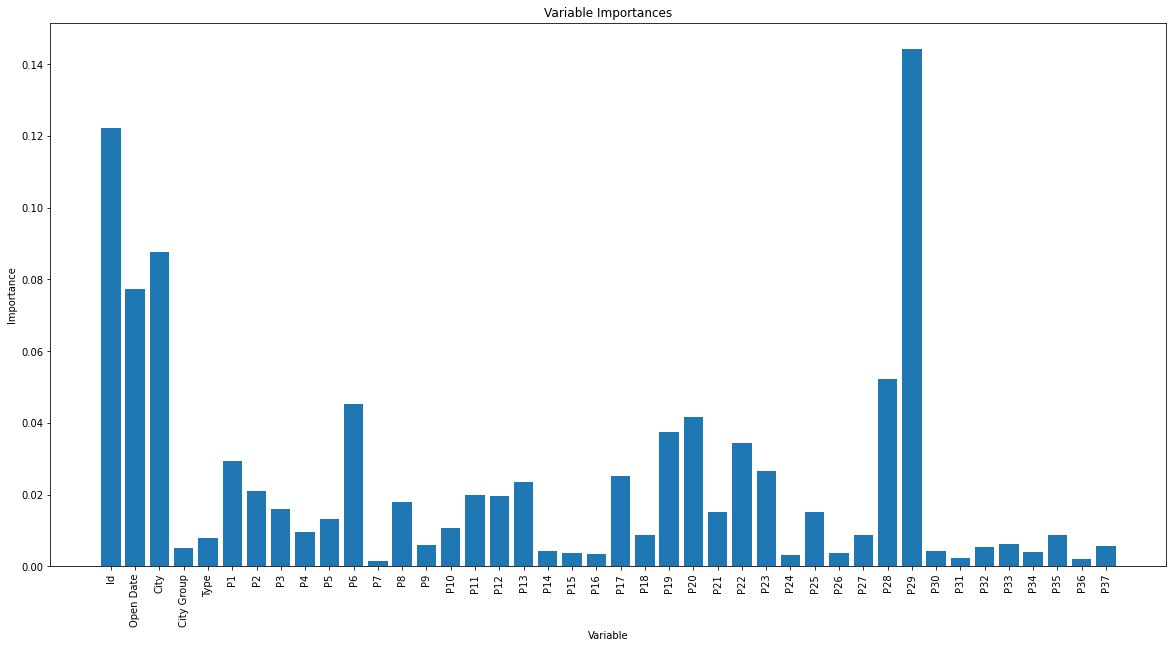

In [56]:
x_values = list(range(len(importances)))
plt.figure(figsize = (20,10))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, dataframe1.columns, rotation ='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [57]:
errors = abs(random_pred - y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 619082.93 degrees.
Accuracy: 83.96 %.


In [58]:
rand_reg_most_important = RandomForestRegressor()
important_indices = [h_list.index('P29'), h_list.index('Id'), h_list.index('City')]
train_important = X[:,important_indices]
test_important = X1[:,important_indices]
rand_reg_most_important.fit(train_important, y)
predictions = rand_reg_most_important.predict(train_important)
errors = abs(predictions - y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 697521.75 degrees.
Accuracy: 81.3 %.


Decision Tree Regression

In [68]:
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X,y)
dec_pred = dec_reg.predict(X)
dec_pred_1 = dec_reg.predict(X1)
dec_mse = mean_squared_error(y,dec_pred)
print(dec_mse)

0.0
